### Часть 1. Модель хищник-жертва

Рассмотрим уравнения Лотки — Вольтерры для динамики популяции хищников и животных-жертв (классический пример системы ОДУ). Уравнения следующие: $x'(t) = ax - bxy$ и $y'(t) = cxy - dy$, где $x(t)$ - количество животных-жертв, а $y(t)$ - количество животных-хищников. Коэффициенты a, b, c и d описывают скорость процессов в модели. Например, $a$ - это скорость, с которой рождаются хищные животные, а $d$ - скорость, с которой хищные животные умирают. Коэффициенты $b$ и $c$ - это скорость, с которой хищники поедают добычу, и скорость, с которой популяция хищников растет за счет популяции жертвы, соответственно. Обратите внимание, что это нелинейная система ОДУ из-за членов $xy$.

Text(0, 0.5, 'Количество хищников')

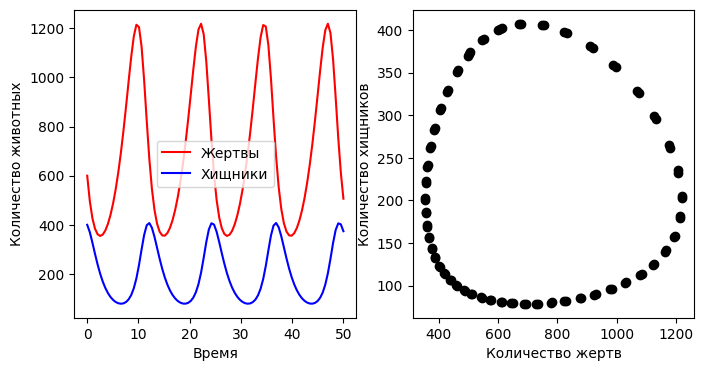

In [2]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# параметры модели
a, b, c, d = 0.4, 0.002, 0.001, 0.7
# правая часть системы
def f(xy_vec, t):
    x, y = xy_vec
    return [a*x - b*x*y, c*x*y - d*y]

# начальные условия
xy_vec0 = [600, 400]
# сетка
t = np.linspace(0, 50, 100)
# решение пакетным методом
xy_t = integrate.odeint(f, xy_vec0, t)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(t, xy_t[:,0], 'r', label="Жертвы")
axes[0].plot(t, xy_t[:,1], 'b', label="Хищники")
axes[0].set_xlabel("Время")
axes[0].set_ylabel("Количество животных")
axes[0].legend()
axes[1].plot(xy_t[:,0], xy_t[:,1], 'ko')
axes[1].set_xlabel("Количество жертв")
axes[1].set_ylabel("Количество хищников")

Слева - график зависимости популяции от времени, справа - фазовое пространство.

Задание: 

Сколько узлов сетки достаточно для адекватного разрешения физики задачи? От чего это зависит? Как понять, сколько узлов задавать? 

Желательно провести исследование не только в текущей постановке задачи, но и в зависимости от параметров модели и начальных условий.

### Ответ 1

Уравнения Лотки - Вольтерры являются автономной системой 2го порядка. Линеризуем систему в окрестности стационарных точек $x^* = \frac{d}{c}, y^* = \frac{a}{b}$:  $x(t) = x^* + δx(t), y(t) = y^* + δy(t)$. Подставим выражения в уравнения Лотки - Вольтерры, получим систему: $\frac{d(\delta x)}{dt} = -\frac{c}{a} \frac{d(\delta y)}{dt}, \frac{d(\delta y)}{dt} = \frac{a}{c} \frac{d(\delta x)}{dt}.$ Тогда получим систему гармонических колебаний $\frac{d^2 (\delta x)}{dt^2} + a d \delta x = 0$ Что является гармоническим уравнением с периодом $T = \frac{2\pi}{\sqrt{ad}}$.

Через период можно примерно оценить шаг. Например мы хотим, чтобы на один период укладывалось n точек (n > 4), тогда $\tau = \frac{2\pi}{n\sqrt{ad}}$. Если мы рассматриваем период времени [0, t], тогда необходимо взять $N = \frac{nt\sqrt{ad}}{2\pi}$

### Часть 2. Метод высокого порядка

Задание: 
1. выписать расчетные формулы для задачи из Части 1 и реализовать метод РК первого и четвертого порядка (не в общем для любой задачи Коши, а для конкретной из Части 1)
2. решить задачу этими методами в изначальной постановке. Сравнить решение с решением с помощью odeint. Оценить влияние точности метода на решение

***ваш ответ***

### Метод Рунге-Кутта 1-го порядка (Метод Эйлера)

Для метода Эйлера имеем следующий шаг:

$$
x(t+h) = x(t) + h \cdot f_x(t, x, y)
$$
$$
y(t+h) = y(t) + h \cdot f_y(t, x, y)
$$

где:

$$
f_x(t, x, y) = a \cdot x - b \cdot x \cdot y
$$
$$
f_y(t, x, y) = c \cdot x \cdot y - d \cdot y
$$

---

### Метод Рунге-Кутта 4-го порядка

Метод Рунге-Кутта 4-го порядка для системы ОДУ включает следующие шаги:

Вычисляем промежуточные значения:

$$
k_1 = h \cdot f_x(t, x, y), \quad l_1 = h \cdot f_y(t, x, y)
$$
$$
k_2 = h \cdot f_x\left(t + \frac{h}{2}, x + \frac{k_1}{2}, y + \frac{l_1}{2}\right), \quad l_2 = h \cdot f_y\left(t + \frac{h}{2}, x + \frac{k_1}{2}, y + \frac{l_1}{2}\right)
$$
$$
k_3 = h \cdot f_x\left(t + \frac{h}{2}, x + \frac{k_2}{2}, y + \frac{l_2}{2}\right), \quad l_3 = h \cdot f_y\left(t + \frac{h}{2}, x + \frac{k_2}{2}, y + \frac{l_2}{2}\right)
$$
$$
k_4 = h \cdot f_x(t + h, x + k_3, y + l_3), \quad l_4 = h \cdot f_y(t + h, x + k_3, y + l_3)
$$

Обновляем значения:

$$
x(t+h) = x(t) + \frac{1}{6} \cdot (k_1 + 2k_2 + 2k_3 + k_4)
$$
$$
y(t+h) = y(t) + \frac{1}{6} \cdot (l_1 + 2l_2 + 2l_3 + l_4)
$$

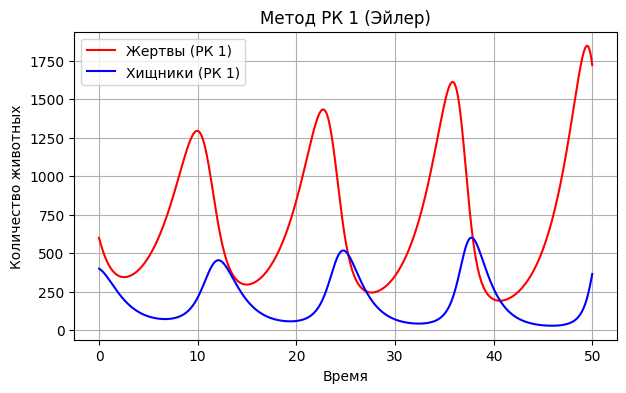

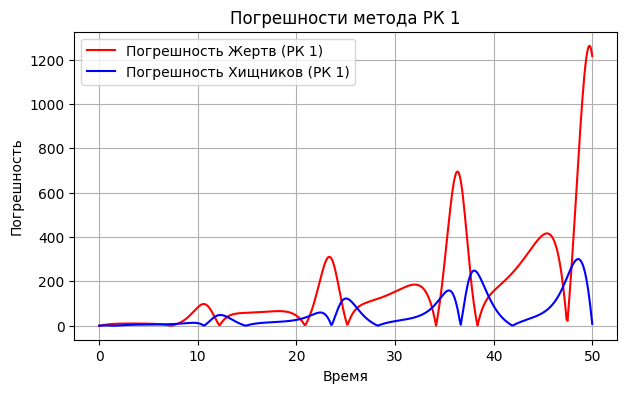

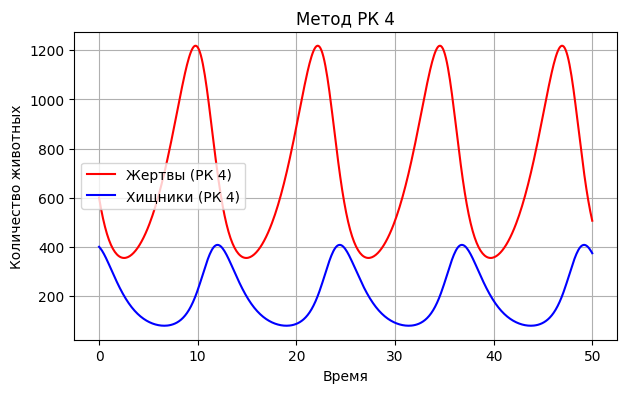

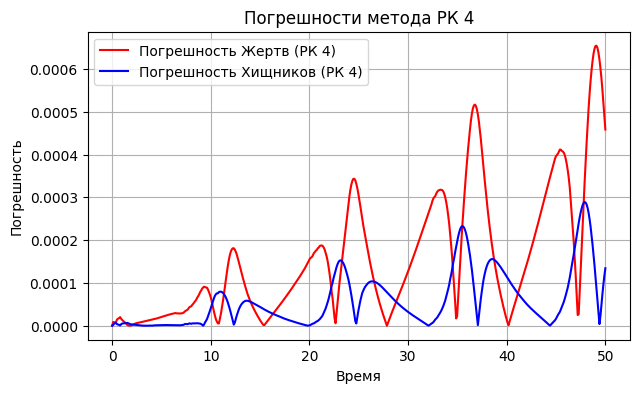

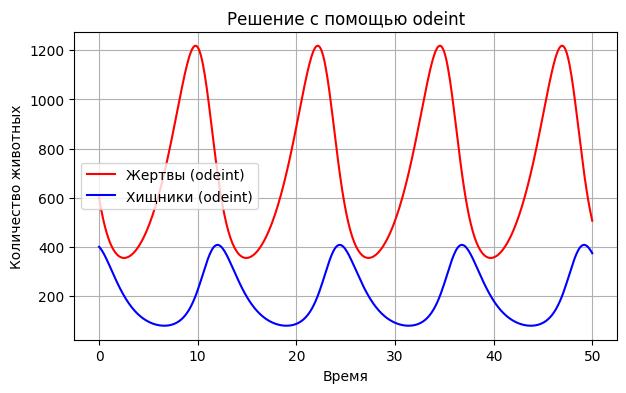

In [ ]:
# Метод Эйлера (РК 1-го порядка)
def runge_kutta_1(xy0, t, h):
    xy = np.zeros((len(t), 2))
    xy[0] = xy0
    for i in range(1, len(t)):
        xy[i] = xy[i - 1] + h * f(t[i - 1], xy[i - 1])
    return xy

# Метод Рунге-Кутта 4-го порядка
def runge_kutta_4(xy0, t, h):
    xy = np.zeros((len(t), 2))
    xy[0] = xy0
    for i in range(1, len(t)):
        k1 = h * f(t[i - 1], xy[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, xy[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, xy[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, xy[i - 1] + k3)
        xy[i] = xy[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return xy
# сетка времени
t = np.linspace(0, 50, 500)
# шаг по времени
h = t[1] - t[0]

# Решение методами РК 1 и РК 4
xy_rk1 = runge_kutta_1(xy0, t, h)
xy_rk4 = runge_kutta_4(xy0, t, h)

# Решение с помощью odeint
from scipy.integrate import odeint
def odeint_model(xy, t):
    return f(t, xy)
xy_odeint = odeint(odeint_model, xy0, t)

# Погрешности
error_rk1_x = np.abs(xy_rk1[:, 0] - xy_odeint[:, 0])
error_rk1_y = np.abs(xy_rk1[:, 1] - xy_odeint[:, 1])

error_rk4_x = np.abs(xy_rk4[:, 0] - xy_odeint[:, 0])
error_rk4_y = np.abs(xy_rk4[:, 1] - xy_odeint[:, 1])

# График для метода РК 1
plt.figure(figsize=(7, 4))
plt.plot(t, xy_rk1[:, 0], 'r', label="Жертвы (РК 1)")
plt.plot(t, xy_rk1[:, 1], 'b', label="Хищники (РК 1)")
plt.xlabel("Время")
plt.ylabel("Количество животных")
plt.title("Метод РК 1 (Эйлер)")
plt.legend()
plt.grid()
plt.show()

# График погрешностей для метода РК 1
plt.figure(figsize=(7, 4))
plt.plot(t, error_rk1_x, 'r', label="Погрешность Жертв (РК 1)")
plt.plot(t, error_rk1_y, 'b', label="Погрешность Хищников (РК 1)")
plt.xlabel("Время")
plt.ylabel("Погрешность")
plt.title("Погрешности метода РК 1")
plt.legend()
plt.grid()
plt.show()

# График для метода РК 4
plt.figure(figsize=(7, 4))
plt.plot(t, xy_rk4[:, 0], 'r', label="Жертвы (РК 4)")
plt.plot(t, xy_rk4[:, 1], 'b', label="Хищники (РК 4)")
plt.xlabel("Время")
plt.ylabel("Количество животных")
plt.title("Метод РК 4")
plt.legend()
plt.grid()
plt.show()

# График погрешностей для метода РК 4
plt.figure(figsize=(7, 4))
plt.plot(t, error_rk4_x, 'r', label="Погрешность Жертв (РК 4)")
plt.plot(t, error_rk4_y, 'b', label="Погрешность Хищников (РК 4)")
plt.xlabel("Время")
plt.ylabel("Погрешность")
plt.title("Погрешности метода РК 4")
plt.legend()
plt.grid()
plt.show()

# График для метода odeint
plt.figure(figsize=(7, 4))
plt.plot(t, xy_odeint[:, 0], 'r', label="Жертвы (odeint)")
plt.plot(t, xy_odeint[:, 1], 'b', label="Хищники (odeint)")
plt.xlabel("Время")
plt.ylabel("Количество животных")
plt.title("Решение с помощью odeint")
plt.legend()
plt.grid()
plt.show()

### Часть 3. Порядок точности метода

Найти численно и построить графики порядка методов из предыдущей части в зависимости от шага сетки в широком диапазоне шага. Объяснить, что мы видим на рисунке. Исследование порядка можно проводить на модельной задаче (не из постановки в задании).

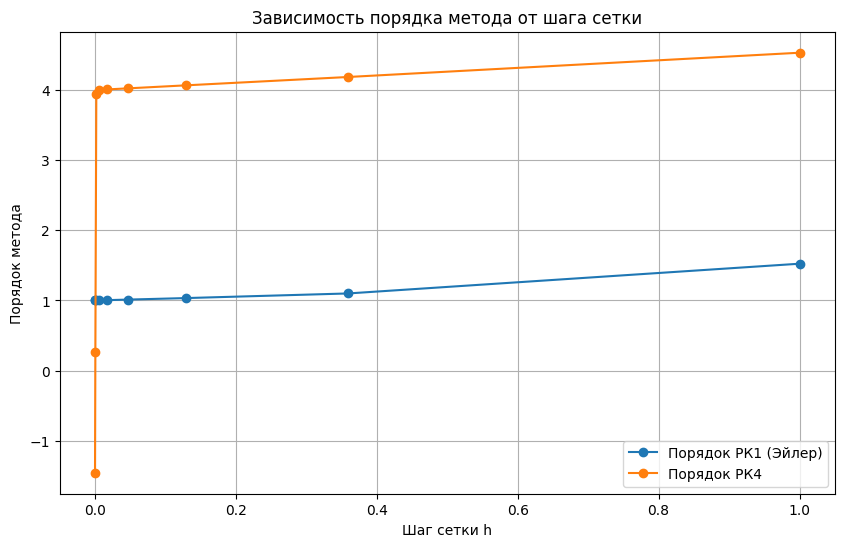

In [ ]:
# ваш код

import numpy as np
import matplotlib.pyplot as plt

# Модельная задача: y' = -y, с начальным условием y(0) = 1
def model(t, y):
    return -y

# Метод Эйлера (РК1)
def runge_kutta_1(y0, t, h):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = y[i-1] + h * model(t[i-1], y[i-1])
    return y

# Метод Рунге-Кутта 4-го порядка
def runge_kutta_4(y0, t, h):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        k1 = h * model(t[i-1], y[i-1])
        k2 = h * model(t[i-1] + 0.5 * h, y[i-1] + 0.5 * k1)
        k3 = h * model(t[i-1] + 0.5 * h, y[i-1] + 0.5 * k2)
        k4 = h * model(t[i-1] + h, y[i-1] + k3)
        y[i] = y[i-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y

# Точное решение
def exact_solution(t):
    return np.exp(-t)

# Диапазон шагов
steps = np.logspace(-4, 0, 10)

# Список погрешностей
errors_rk1 = []
errors_rk4 = []

# Проверяем погрешности для каждого шага
for h in steps:
    t = np.arange(0, 5, h)  # интервал времени
    y_exact = exact_solution(t)
    
    # Решение методами РК1 и РК4
    y_rk1 = runge_kutta_1(1, t, h)
    y_rk4 = runge_kutta_4(1, t, h)
    
    # Погрешности
    error_rk1 = np.max(np.abs(y_rk1 - y_exact))
    error_rk4 = np.max(np.abs(y_rk4 - y_exact))
    
    errors_rk1.append(error_rk1)
    errors_rk4.append(error_rk4)

# Рассчитываем порядок метода для каждой пары шагов
def calculate_order(errors, steps):
    orders = []
    for i in range(1, len(steps)):
        order = np.log(errors[i-1] / errors[i]) / np.log(steps[i-1] / steps[i])
        orders.append(order)
    return orders

orders_rk1 = calculate_order(errors_rk1, steps)
orders_rk4 = calculate_order(errors_rk4, steps)

# Построение графиков порядка методов
plt.figure(figsize=(10, 6))
plt.plot(steps[1:], orders_rk1, label="Порядок РК1 (Эйлер)", marker='o')
plt.plot(steps[1:], orders_rk4, label="Порядок РК4", marker='o')
plt.xlabel('Шаг сетки h')
plt.ylabel('Порядок метода')
plt.title('Зависимость порядка метода от шага сетки')
plt.legend()
plt.grid(True)
plt.show()

***ваш ответ***

Возьмём два разных шага $h_1$ и $h_2$
$$
\text{error}(h_1) = C \cdot h_1^p
$$
$$
\text{error}(h_2) = C \cdot h_2^p
$$
Поделим первое на второе:

$$
\left( \frac{\text{error}(h_1)}{\text{error}(h_2)} \right) = \left( \frac{h_1}{h_2} \right)^p
$$

Для вычисления порядка $p$, применяем логарифм по обеим частям уравнения:

$$
\ln \left( \frac{\text{error}(h_1)}{\text{error}(h_2)} \right) = p \cdot \ln \left( \frac{h_1}{h_2} \right)
$$

Таким образом, порядок метода можно выразить как:

$$
p = \frac{\ln \left( \frac{\text{error}(h_1)}{\text{error}(h_2)} \right)}{\ln \left( \frac{h_1}{h_2} \right)}
$$

Заметим, что при больших $h$ возникает отклонение от ожидаемого теоретического результата, что объясняется тем, что константы $C$ начинают существенно различаться для разных шагов.